## 1. Work_Year Analysis (Univariate)
## 2. Company_size vs Remote_Ratio
## 3. Job Title  vs Experience Level 

In [26]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as np
import zipfile
from operator import add
import scipy.stats
from scipy.stats import chi2

In [27]:
#Read in CSV
salary = "./ds_salaries.csv"
df = pd.read_csv(salary)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [28]:
#Finding and dropping duplicate rows
duplicates = df[df.duplicated()]
df = df.drop_duplicates()
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [29]:
#Count of unique values
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [30]:
#Null Values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [31]:
#Shape of Dataframe (Rows, Columns)
shape = df.shape
shape

(2584, 11)

In [32]:
#Info about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
work_year             2584 non-null int64
experience_level      2584 non-null object
employment_type       2584 non-null object
job_title             2584 non-null object
salary                2584 non-null int64
salary_currency       2584 non-null object
salary_in_usd         2584 non-null int64
employee_residence    2584 non-null object
remote_ratio          2584 non-null int64
company_location      2584 non-null object
company_size          2584 non-null object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [33]:
#Summary Statistics of the Dataframe
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


## Univariate Analysis of Work_Year

In [34]:
#Work_Year Counts
wy = df["work_year"].value_counts()
wy

2023    1156
2022    1125
2021     228
2020      75
Name: work_year, dtype: int64

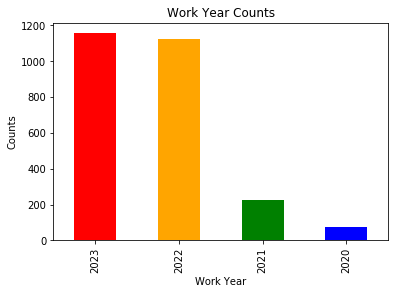

In [35]:
#Plotting Work Year (Univariate Plot)
fig, ax = plt.subplots()
color = ["red", "orange", "green", "blue"]
bars = wy.plot(kind="bar", title = "Work Year Counts", color = color)
ax.set_xlabel('Work Year')
ax.set_ylabel('Counts')
plt.show()
#plt.savefig('output_data/Fig1.png')

## Univaraite Analysis

1. Work_Year: 2023 has the most amount of inputs while 2020 has the least amount of inputs

## 2. Company_size vs Remote_Ratio

In [36]:
##Company Size Data Based on Remote_Ratio
cs = df.groupby("company_size")["remote_ratio"].mean().reset_index()
cs = round(cs,2)
cs  

,company_size,remote_ratio
0,L,63.57
1,M,46.23
2,S,72.79


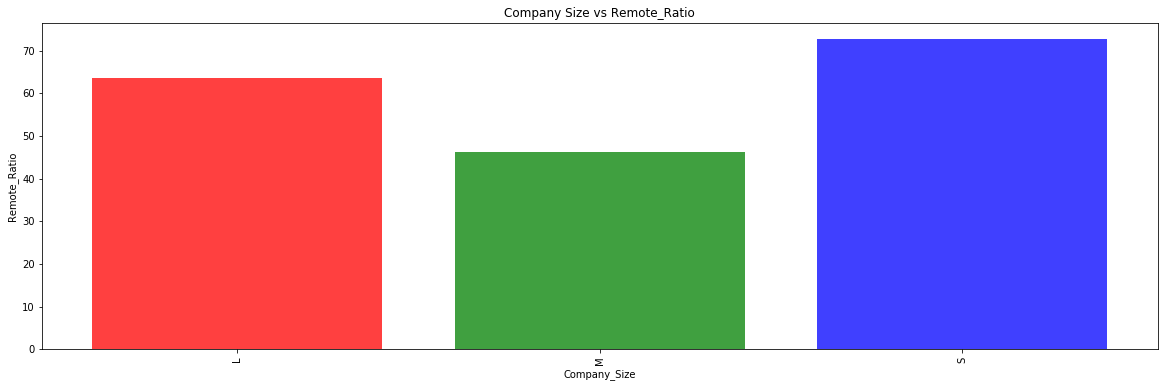

In [37]:
#Plotting Company_size vs Remote_Ratio
fig = plt.figure(figsize = (20,6))
color = ["red", "green", "blue"]
plt.bar(cs["company_size"], cs["remote_ratio"], color = color, alpha = 0.75)
plt.xlabel("Company_Size")
plt.ylabel("Remote_Ratio")
plt.title("Company Size vs Remote_Ratio")
plt.xticks(rotation = 90)
plt.show()
#plt.savefig('output_data/Fig2.png')

## 3. Job Title  vs Experience Level 

In [38]:
##Company Location Grouped Data Based on Salary
exp_level = df.groupby(['job_title','experience_level']).size().reset_index(name='count')
exp_level = round(exp_level,2)
exp_level.head()

,job_title,experience_level,count
0,3D Computer Vision Researcher,EN,2
1,3D Computer Vision Researcher,MI,1
2,3D Computer Vision Researcher,SE,1
3,AI Developer,EN,6
4,AI Developer,MI,2


In [39]:
SE_lis = []
MI_lis = []
EN_lis = []
EX_lis = []
SE = 0
MI = 0
EN = 0
EX = 0
set_var = exp_level['job_title'][0]
for i in range(len(exp_level)):
    job_setter = exp_level['job_title'][i]
    if(job_setter != set_var):
        SE_lis.append(SE)
        MI_lis.append(MI)
        EN_lis.append(EN)
        EX_lis.append(EX)
        set_var = job_setter
        SE = 0
        MI = 0
        EN = 0 
        EX = 0
    exp_setter = exp_level['experience_level'][i]
    if(exp_setter == 'SE'):
        SE += exp_level['count'][i]
    elif(exp_setter == 'MI'):
        MI += exp_level['count'][i]
    elif(exp_setter == 'EN'):
        EN += exp_level['count'][i]
    elif(exp_setter == 'EX'):
        EX += exp_level['count'][i]
SE_lis.append(SE)
MI_lis.append(MI)
EN_lis.append(EN)
EX_lis.append(EX)

In [40]:
SE_MI = list(map(add, SE_lis, MI_lis))
SE_MI_EN = list(map(add, SE_MI, EN_lis))

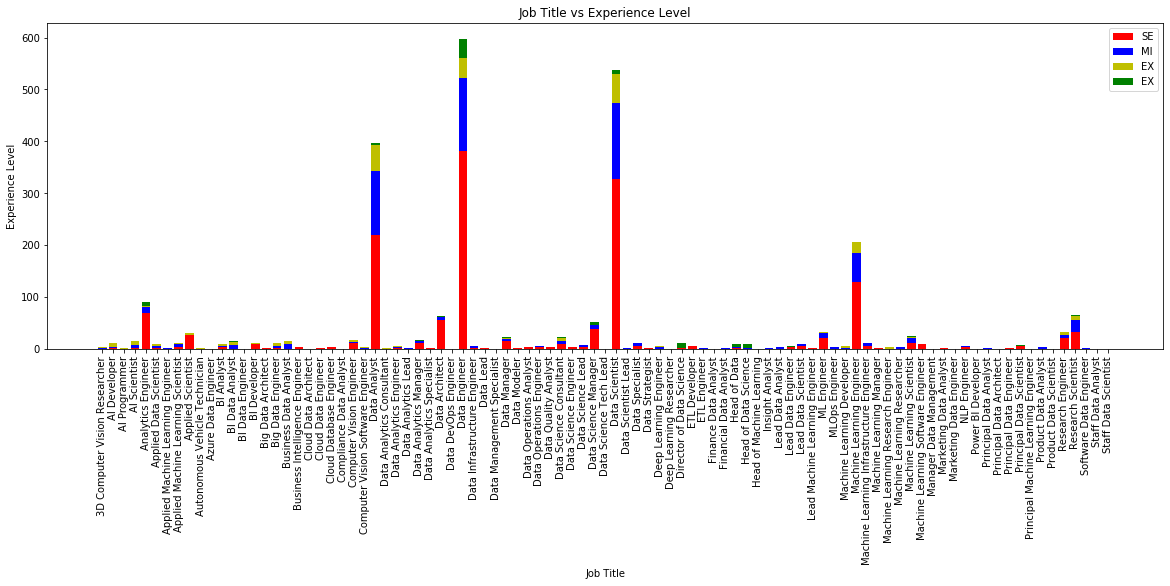

In [42]:
x = exp_level['job_title'].unique()
fig = plt.figure(figsize = (20,6))
plt.bar(x, SE_lis, color='r')
plt.bar(x, MI_lis, bottom = SE_lis, color = 'b')
plt.bar(x, EN_lis, bottom = SE_MI, color = 'y')
plt.bar(x, EX_lis, bottom = SE_MI_EN, color = 'g')
plt.xlabel("Job Title")
plt.ylabel("Experience Level")
plt.legend(["SE", "MI", "EX", "EX"])
plt.title("Job Title vs Experience Level")
plt.xticks(rotation=90)
plt.show()

## Chi-Square Test of Independence

Null Hypothesis: The two variables, job title and experience level are independent of each other

Alternate Hypothesis: The two variables, job title and experience level are dependant on each other

In [43]:
ct_table_ind=pd.crosstab(df["job_title"], df["experience_level"])
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")

chi2 statistic:     980.44
p-value:            1.3329e-79
degrees of freedom: 276


## Bivariate Analysis

1. Company_size vs Remote_Ratio:

2. Experience level vs Job Title: Because our chi-square of independence test has a p-value less than